In [ ]:
# Instala RDKit usando Conda (toma ~1 min)
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
# Vuelve a ejecutar esto después del reinicio
!mamba install -c conda-forge rdkit -y


Looking for: ['rdkit']

conda-forge/linux-64                                        Using cache
conda-forge/noarch                                          Using cache

Pinned packages:
  - python 3.11.*
  - python 3.11.*
  - python_abi 3.11.* *cp311*
  - cuda-version 12.*


Transaction

  Prefix: /usr/local

  All requested packages already installed



In [ ]:
import pandas as pd
from rdkit import Chem
from google.colab import files

In [ ]:
# Carga interactiva del archivo
uploaded = files.upload()

# Carga del primer archivo cargado como DataFrame
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
df.head()

Saving Metal_Approved_Constitutional_Knime.csv to Metal_Approved_Constitutional_Knime (2).csv


,Name,Type,Total number of atoms,Number of heteroatoms,NumStereocenters,Number of carbons,Number of hydrogens,NumAmideBonds,Number of aromatic atoms,Number of aliphatic atoms,NumRings,NumAromaticRings,NumAliphaticRings,NumSaturatedRings,Number of heteroatoms in aromatic rings,FractionCSP3,Molecular Formula
0,Oxaliplatin,Metallodrug,9,5,0,2,2,0,0,9,0,0,0,0,0,0.000000,C2H2O4Pt
1,Carboplatin,Metallodrug,19,5,0,6,8,0,0,19,1,0,1,1,0,0.666667,C6H8O4Pt
2,Lobaplatin,Metallodrug,33,6,3,9,18,0,0,33,1,0,1,1,0,0.888889,C9H18N2O3Pt
3,Nedaplatin,Metallodrug,10,4,0,2,4,0,0,10,0,0,0,0,0,0.500000,C2H4O3Pt
4,Picoplatin,Metallodrug,17,4,0,6,7,0,6,11,1,1,0,0,1,0.166667,C6H7Cl2NPt


In [ ]:
#Seleccionar las columnas numéricas para graficar
features = ['Total number of atoms', 'Number of heteroatoms', 'NumStereocenters', 'Number of carbons', 'Number of hydrogens', 'NumAmideBonds', 'Number of aromatic atoms', 'Number of aliphatic atoms', 'NumRings', 'NumAromaticRings', 'Number of heteroatoms in aromatic rings',  'NumSaturatedRings', 'NumAliphaticRings', 'FractionCSP3']

ValueError: number sections must be larger than 0.

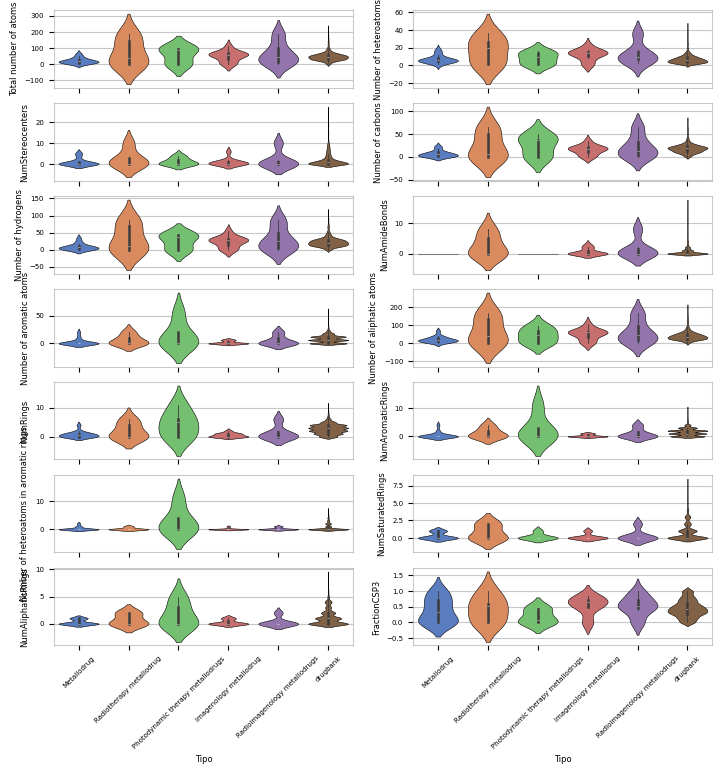

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supongamos que df y features ya están definidos

n_rows = 7
n_cols = 2
total_plots = n_rows * n_cols

# Asegurar que hay suficientes features
features_extended = features + [''] * (total_plots - len(features))

# Crear figura con dimensiones de 3/4 de una hoja tamaño carta (8.5 x 8.25 pulgadas)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(8.5, 8.25), sharey=False)
axes = axes.flatten()

handles_labels = None

for i, feature in enumerate(features_extended):
    ax = axes[i]

    if feature:
        ax.grid(True, axis='y', linestyle='-', alpha=0.7, zorder=1)

        # Cambiar color de los bordes al mismo que el grid
        for spine in ax.spines.values():
            spine.set_edgecolor((0.7, 0.7, 0.7))  # gris claro similar a alpha=0.7 en grid
            spine.set_alpha(0.7)

        sns.violinplot(
            data=df,
            x='Type',
            y=feature,
            hue='Type',
            palette='muted',
            dodge=False,
            zorder=2,
            ax=ax,
            linewidth=0.4  # línea del contorno del violín más delgada
        )

        # Cambiar color del contorno del violín a negro
        for violin in ax.collections:
            violin.set_edgecolor("black")

        ax.tick_params(axis='x', rotation=45, labelsize=5)
        ax.tick_params(axis='y', labelsize=5)

        if i in [total_plots - 2, total_plots - 1]:
            ax.set_xlabel('Tipo', fontsize=6)
        else:
            ax.set_xlabel('')
            ax.set_xticklabels([])

        ax.set_ylabel(feature, fontsize=6)

        legend = ax.get_legend()
        if legend:
            legend.remove()

        if handles_labels is None:
            handles_labels = ax.get_legend_handles_labels()

    else:
        ax.axis('off')

if handles_labels:
    handles, labels = handles_labels
    fig.legend(handles, labels, loc='upper center', ncol=len(labels), fontsize=6, title='Type', title_fontsize=7)

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.tight_layout(rect=[0, 0.02, 1, 0.92])

plt.savefig("violin_plots.png", dpi=1200)

plt.show()

In [ ]:
import pandas as pd

# Crear un nuevo DataFrame para almacenar los resultados
summary_df = pd.DataFrame()

# Iterar sobre las características y calcular los estadísticos
for feature in features:
    stats = df.groupby('Type')[feature].agg(['mean', 'std']).round(2)
    stats_formatted = stats.apply(lambda row: f"{row['mean']} ± {row['std']}", axis=1)
    summary_df[feature] = stats_formatted

# Transponer para que cada fila sea un feature y cada columna un tipo
summary_df = summary_df.T
summary_df.columns.name = None  # Eliminar el nombre del índice de columnas si existe
summary_df.index.name = 'Feature'

# Mostrar el DataFrame
summary_df


,Imagenology metallodrug,Metallodrug,Photodynamic therapy metallodrugs,Radioimagenology metallodrugs,Radiotherapy metallodrug,drugbank
Feature,,,,,,
Total number of atoms,51.18 ± 32.98,22.06 ± 18.02,57.8 ± 52.0,67.36 ± 68.89,74.0 ± 86.29,48.1 ± 26.81
Number of heteroatoms,12.18 ± 6.6,7.0 ± 4.47,8.2 ± 7.05,13.55 ± 11.88,16.6 ± 15.47,6.75 ± 4.82
NumStereocenters,1.0 ± 1.79,0.94 ± 1.77,1.2 ± 1.79,2.0 ± 4.0,2.6 ± 4.34,2.04 ± 3.3
Number of carbons,15.55 ± 10.4,6.44 ± 6.99,24.6 ± 22.98,22.18 ± 24.21,24.0 ± 30.75,18.31 ± 10.02
Number of hydrogens,23.45 ± 16.34,8.62 ± 9.53,25.0 ± 22.93,31.64 ± 33.84,33.4 ± 41.11,23.04 ± 14.32
NumAmideBonds,0.64 ± 1.12,0.0 ± 0.0,0.0 ± 0.0,1.73 ± 3.17,2.6 ± 3.71,0.66 ± 1.46
Number of aromatic atoms,1.64 ± 2.8,2.38 ± 5.71,15.2 ± 24.4,5.45 ± 8.57,6.2 ± 9.34,8.14 ± 6.71
Number of aliphatic atoms,49.55 ± 31.36,19.69 ± 16.54,42.2 ± 41.72,61.91 ± 61.54,67.8 ± 77.4,39.95 ± 25.39
NumRings,0.55 ± 0.69,0.75 ± 1.06,4.4 ± 4.62,1.36 ± 2.38,2.0 ± 2.83,2.71 ± 1.69
